# Library

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install protobuf==3.20


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.19.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-aiplatform 1.73.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery-connection 1.16.1 requir

In [ ]:
# !pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

In [23]:
import os
import cv2
import random
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
    ModelCheckpoint,
    LearningRateScheduler
)
import sklearn.metrics
import torch
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

# Data Gathering

In [3]:
# Path ke folder dataset
#input_dir = "/content/drive/MyDrive/New_Model/Datasets"
input_dir = r"C:\Users\WatsonNick\Bangkit EcoCraft\Dataset"

# Membaca nama folder yang ada
columns = [folder for folder in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, folder))]

# Buat daftar untuk menyimpan semua file dan kategori biner
merged_unique = []
allColumn_lists = []

# Loop melalui setiap kategori
for category in columns:
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):
        # Ambil semua file .jpg dalam kategori ini
        category_files = [f for f in os.listdir(category_path) if f.endswith('.jpg') and os.path.isfile(os.path.join(category_path, f))]

        if category_files:  # Hanya tambahkan jika ada file
            # Tambahkan file ke merged_unique
            merged_unique.extend(category_files)
            # Tambahkan daftar file kategori ke allColumn_lists
            allColumn_lists.append(category_files)
        else:
            print(f"Warning: Folder '{category}' kosong atau tidak memiliki file .jpg.")
            allColumn_lists.append([])  # Tambahkan daftar kosong jika folder kosong
    else:
        print(f"Error: Folder '{category}' tidak ditemukan di '{input_dir}'.")
        allColumn_lists.append([])  # Tambahkan daftar kosong jika folder tidak ditemukan

# Hilangkan duplikasi di merged_unique
merged_unique = list(set(merged_unique))

# Buat kolom biner untuk setiap kategori
all_bin_columns = []
for column in allColumn_lists:
    bin_column = []
    for merged_file in merged_unique:
        if merged_file in column:
            bin_column.append(1)  # Cocok
        else:
            bin_column.append(0)  # Tidak cocok
    all_bin_columns.append(bin_column)

# Cek apakah jumlah kategori cocok
if len(columns) != len(all_bin_columns):
    print("Error: Jumlah kolom tidak cocok dengan jumlah kategori!")
    print(f"columns: {len(columns)}, all_bin_columns: {len(all_bin_columns)}")
    exit()

# Buat DataFrame untuk memetakan file dan kategori biner
imageMap_train = pd.DataFrame({'Filenames': merged_unique})
for i, category in enumerate(columns):
    imageMap_train[category] = all_bin_columns[i]

# Atur agar semua kolom terlihat saat dicetak
pd.set_option('display.max_columns', None)

# Tampilkan DataFrame hasil
print(imageMap_train.head(10))

                                           Filenames  Bohlam  Botol  Garpu  \
0  IMG_20240114_135855_jpg.rf.54033ff4757ff8f448d...       0      0      0   
1  paper273_jpg.rf.368ba0e83dd10e7c76c44aba0322e4...       0      0      0   
2  images7_jpg.rf.36c52b40a693356d16fa90a7f2d8006...       0      0      0   
3  paper109_jpg.rf.3da896f82149b1e441e74d0c77c76b...       0      0      0   
4                              IMG20230408135028.jpg       0      0      0   
5                                             67.jpg       0      0      0   
6  images206_jpg.rf.2b573d04f928d9d0fc0b125355df6...       0      0      0   
7  paper268_jpg.rf.b0fa300b86bb5bbdbb336cc8687e3d...       0      0      0   
8  Ligth_bulb_126_jpg.rf.17f54329cc1b5fc064c79bc7...       1      0      0   
9  IMG_20240709_005650_jpg.rf.c7bc65b76a9b15da76f...       0      0      0   

   Gelas  Hanger  Kain  Kaleng  Kardus  Kertas  Kotak susu  Sendok  \
0      1       0     0       0       0       0           0       0   
1

In [4]:
# Dictionary untuk menyimpan jumlah sampel per kategori
category_counts = defaultdict(int)

# Loop melalui setiap kategori di dalam folder
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Pastikan itu folder
        # Hitung jumlah file JPG dalam kategori ini
        num_files = len([f for f in os.listdir(category_path) if f.endswith('.jpg') and os.path.isfile(os.path.join(category_path, f))])
        category_counts[category] += num_files

# Hitung total sampel dan jumlah unik
total_samples = sum(category_counts.values())
unique_samples = len(category_counts)

# Cetak hasil
print("Number of Samples:")
print("-------------------------")
for category, count in category_counts.items():
    print(f"{category} = {count}")
print("--------------------------")
print(f"Total number of samples = {total_samples}")
print(f"Total number of Unique samples = {unique_samples}")

Number of Samples:
-------------------------
Bohlam = 200
Botol = 289
Garpu = 170
Gelas = 264
Hanger = 238
Kain = 100
Kaleng = 272
Kardus = 259
Kertas = 293
Kotak susu = 109
Sendok = 147
Tutup Botol = 242
--------------------------
Total number of samples = 2583
Total number of Unique samples = 12


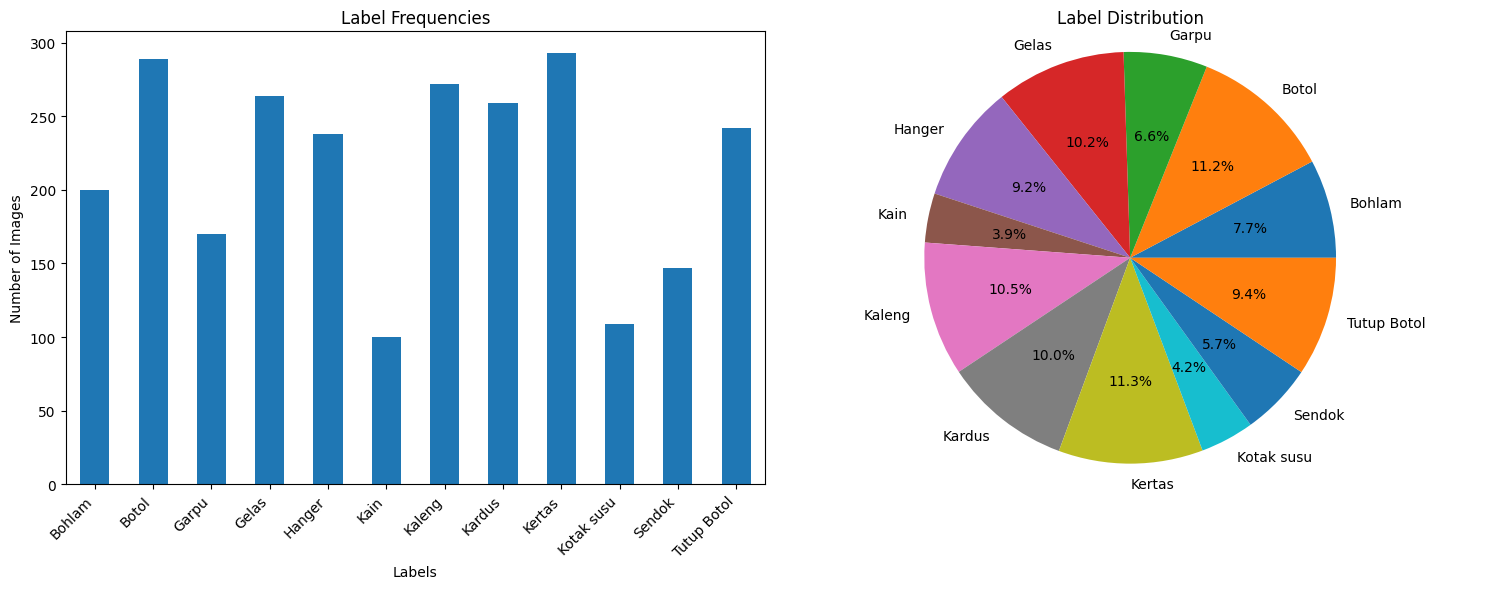

In [5]:
"""Visualize multilabel distribution in the dataset"""

# Get label columns (excluding 'Image_Name')
label_columns = imageMap_train.columns.tolist()[1:]

# Calculate label frequencies
label_frequencies = imageMap_train[label_columns].sum()

# Plotting
plt.figure(figsize=(15, 6))

# Bar plot of label frequencies
plt.subplot(1, 2, 1)
label_frequencies.plot(kind='bar')
plt.title('Label Frequencies')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Pie chart of label distribution
plt.subplot(1, 2, 2)
plt.pie(label_frequencies, labels=label_frequencies.index, autopct='%1.1f%%')
plt.title('Label Distribution')
plt.axis('equal')
plt.tight_layout()

plt.show()

In [6]:
# Directory of dataset
categories = [folder for folder in os.listdir(input_dir)
                if os.path.isdir(os.path.join(input_dir, folder))]

# Total images to display
total_samples = 10  # Adjust total number of images to display
images_per_class = total_samples // len(categories)

selected_images = []

for category in categories:
    folder_path = os.path.join(input_dir, category)
    # Get all image files in this folder
    all_images = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

    # Ensure number of images picked doesn't exceed available images
    if len(all_images) < images_per_class:
        selected_images += random.sample(all_images, len(all_images))  # Take all if not enough
    else:
        selected_images += random.sample(all_images, images_per_class)  # Take requested number

# Create visualization using matplotlib (works in most environments)
def visualize_images(image_paths):
    # Create a new figure with appropriate size
    plt.figure(figsize=(15, 10))

    # Calculate grid dimensions
    rows = 3
    cols = 5

    # Iterate through selected images
    for idx, image_path in enumerate(image_paths):
        # Read image with OpenCV (converts to RGB)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Resize image to ensure consistency
        img_resized = cv2.resize(img_rgb, (224, 224))

        # Create subplot
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img_resized)

        # Get category name (last directory name)
        category = os.path.basename(os.path.dirname(image_path))
        plt.title(category, fontsize=10)

        # Remove axis
        plt.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Visualize the selected images
visualize_images(selected_images)

# Optional: Save the figure
plt.savefig('dataset_sample_images.png', dpi=300, bbox_inches='tight')

# Bonus: Print out selected image details
print("\nSelected Images:")
for img_path in selected_images:
    print(f"Category: {os.path.basename(os.path.dirname(img_path))}, "
          f"Filename: {os.path.basename(img_path)}")

<Figure size 1500x1000 with 0 Axes>


Selected Images:


<Figure size 640x480 with 0 Axes>

# Split Data

In [11]:
# Main workflow
# output_dataset_dir = "/content/drive/MyDrive/New_Model/Organized_Dataset"
# model_output_dir = "/content/drive/MyDrive/New_Model/Waste_Detection_Model"
# input_dir="/content/drive/MyDrive/New_Model/Dataset"

output_dataset_dir = "Organized_Dataset"
model_output_dir = "Waste_Detection_Model"

# Ensure directories exist
os.makedirs(output_dataset_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Create train, val, and test directories
subsets = ['train', 'val', 'test']
for subset in subsets:
    os.makedirs(os.path.join(output_dataset_dir, subset), exist_ok=True)

# Iterate through categories
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if not os.path.isdir(category_path):
        continue  # Skip non-directory files

    # List all images in the category
    all_images = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if len(all_images) == 0:
        print(f"No images found in category {category}. Skipping...")
        continue  # Skip categories with no images

    # Split into train, val, test
    train_images, temp_images = train_test_split(all_images, train_size=0.8, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Move files into corresponding directories
    for subset, images in zip(subsets, [train_images, val_images, test_images]):
        subset_dir = os.path.join(output_dataset_dir, subset, category)
        os.makedirs(subset_dir, exist_ok=True)
        for img in images:
            src = os.path.join(category_path, img)
            dst = os.path.join(subset_dir, img)
            
            # Debug print statements
            print(f"Attempting to copy:")
            print(f"Source: {src}")
            print(f"Destination: {dst}")
            
            # Add checks before copying
            if not os.path.exists(src):
                print(f"ERROR: Source file does not exist: {src}")
                continue
            
            try:
                shutil.copy2(src, dst)
            except Exception as e:
                print(f"Error copying {img}: {e}")

print("Dataset reorganization attempt completed!")

Attempting to copy:
Source: C:\Users\WatsonNick\Bangkit EcoCraft\Dataset\Bohlam\Ligth_bulb_169_jpg.rf.1a04b37962e97e2c53d52c83cbab304d.jpg
Destination: Organized_Dataset\train\Bohlam\Ligth_bulb_169_jpg.rf.1a04b37962e97e2c53d52c83cbab304d.jpg
Attempting to copy:
Source: C:\Users\WatsonNick\Bangkit EcoCraft\Dataset\Bohlam\Ligth_bulb_98_jpg.rf.4cfffb1ce14bc3ad953ed2b7e683e7b4.jpg
Destination: Organized_Dataset\train\Bohlam\Ligth_bulb_98_jpg.rf.4cfffb1ce14bc3ad953ed2b7e683e7b4.jpg
Attempting to copy:
Source: C:\Users\WatsonNick\Bangkit EcoCraft\Dataset\Bohlam\Ligth_bulb_131_jpg.rf.dc3c947dbb7d0b5f1dca4008277b0e2d.jpg
Destination: Organized_Dataset\train\Bohlam\Ligth_bulb_131_jpg.rf.dc3c947dbb7d0b5f1dca4008277b0e2d.jpg
Attempting to copy:
Source: C:\Users\WatsonNick\Bangkit EcoCraft\Dataset\Bohlam\Ligth_bulb_119_jpg.rf.2261a364d117801e779b4ab1a1cb6586.jpg
Destination: Organized_Dataset\train\Bohlam\Ligth_bulb_119_jpg.rf.2261a364d117801e779b4ab1a1cb6586.jpg
Attempting to copy:
Source: C:\Use

# Data Generator

In [13]:
def create_data_generators(train_dir, val_dir, input_shape=(224, 224, 3), batch_size=32):
    # Data augmentation for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    # Simple rescaling for validation
    val_datagen = ImageDataGenerator(rescale=1./255)

    # Create generators
    def multi_hot_generator(datagen, directory, **kwargs):
        # Initial generator
        generator = datagen.flow_from_directory(
            directory,
            target_size=input_shape[:2],
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            **kwargs
        )

        # Modify generator
        for x, y in generator:
            # Convert to multi-hot labels
            y_multi_hot = np.zeros_like(y, dtype=float)
            for i in range(y.shape[0]):
                # Find indices of '1's in the one-hot encoded labels
                label_indices = np.where(y[i] == 1)[0]
                y_multi_hot[i, label_indices] = 1.0

            yield x, y_multi_hot

    # Create custom generators
    train_generator = multi_hot_generator(train_datagen, train_dir)
    val_generator = multi_hot_generator(val_datagen, val_dir)

    # Count number of classes
    initial_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )
    num_classes = len(initial_generator.class_indices)

    # Print class indices for reference
    print("Class Indices:", initial_generator.class_indices)
    print("Number of Classes:", num_classes)

    return train_generator, val_generator, num_classes

In [14]:
# Prepare data generators
# train_dir = os.path.join(output_dataset_dir, '/content/drive/MyDrive/New_Model/Organized_Dataset/train')
# val_dir = os.path.join(output_dataset_dir, '/content/drive/MyDrive/New_Model/Organized_Dataset/val')
# test_dir = os.path.join(output_dataset_dir, '/content/drive/MyDrive/New_Model/Organized_Dataset/test')

train_dir = os.path.join(output_dataset_dir, 'train')
val_dir = os.path.join(output_dataset_dir, 'val')
test_dir = os.path.join(output_dataset_dir, 'test')

# Create data generators
train_generator, val_generator, num_classes = create_data_generators(
    train_dir,
    val_dir
)

Found 2095 images belonging to 12 classes.
Class Indices: {'Bohlam': 0, 'Botol': 1, 'Garpu': 2, 'Gelas': 3, 'Hanger': 4, 'Kain': 5, 'Kaleng': 6, 'Kardus': 7, 'Kertas': 8, 'Kotak susu': 9, 'Sendok': 10, 'Tutup Botol': 11}
Number of Classes: 12


# Model

In [57]:
def build_model(input_shape=(224, 224, 3), num_classes=9, fine_tune_at=None):
    # Load pre-trained model
    base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze base model layers
    if fine_tune_at:
        # Unfreeze the layers from `fine_tune_at` onwards
        for layer in base_model.layers[fine_tune_at:]:
            layer.trainable = True
    else:
        base_model.trainable = False

    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)

    # Output layer with sigmoid activation
    output_layer = Dense(num_classes, activation='sigmoid', name='waste_classification')(x)

    # Create final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    return model

In [37]:
# Build model
model = build_model(num_classes=12)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

# Contoh penggunaan dengan model
model.compile(optimizer=Adam(learning_rate=1e-4), loss=loss_fn, metrics=['accuracy'])


In [38]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 111, 111,  │        128 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_376      │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 111, 111,  │        352 │ activation_376[0… │
│ (Conv2D)            │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 111, 111,  │         44 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_377      │ (None, 111, 111,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_379      │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 115, 115,  │          0 │ activation_377[0… │
│ (ZeroPadding2D)     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 117, 117,  │          0 │ activation_379[0… │
│ (ZeroPadding2D)     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │        396 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      1,920 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_378      │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_380      │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 56, 56,    │        396 │ activation_378[0

 Total params: 4,976,672 (18.98 MB)

 Trainable params: 706,956 (2.70 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

In [39]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr  # Keep learning rate same in the first 10 epochs
    else:
        return float(lr * tf.math.exp(-0.1))  # Apply exponential decay


In [40]:
def train_model(model, train_generator, val_generator, train_dir, val_dir, epochs=50):
    # Hitung jumlah sampel di setiap direktori
    def count_samples(directory):
        total_samples = 0
        for root, dirs, files in os.walk(directory):
            # Hitung file gambar (dengan ekstensi umum)
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
            total_samples += len(image_files)
        return total_samples

    train_samples = count_samples(train_dir)
    val_samples = count_samples(val_dir)

    batch_size = 32  # Sesuaikan dengan batch_size di generator
    steps_per_epoch = max(1, train_samples // batch_size)
    validation_steps = max(1, val_samples // batch_size)

    print(f"Total training samples: {train_samples}")
    print(f"Total validation samples: {val_samples}")
    print(f"Steps per epoch: {steps_per_epoch}")
    print(f"Validation steps: {validation_steps}")

    # Learning rate reducer
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Early stopping
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    # Model checkpoint
    model_checkpoint = ModelCheckpoint(
        filepath=os.path.join(model_output_dir, 'best_model.keras'),
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )

    lr_scheduler = LearningRateScheduler(scheduler)
    # Train the model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=[lr_scheduler, reduce_lr, early_stop, model_checkpoint]
    )

    return history

In [41]:
# Fine-tuning function
def fine_tune_model(model, train_generator, val_generator, train_dir, val_dir, fine_tune_at=20, epochs=25):
    model.trainable = True  # Unfreeze the entire model
    def count_samples(directory):
        total_samples = 0
        for root, dirs, files in os.walk(directory):
            # Hitung file gambar (dengan ekstensi umum)
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
            total_samples += len(image_files)
        return total_samples

    train_samples = count_samples(train_dir)
    val_samples = count_samples(val_dir)

    batch_size = 32  # Sesuaikan dengan batch_size di generator
    steps_per_epoch = max(1, train_samples // batch_size)
    validation_steps = max(1, val_samples // batch_size)
    # Unfreeze the last 'fine_tune_at' layers
    for layer in model.layers[:-fine_tune_at]:
        layer.trainable = False
    loss_fn = tf.keras.losses.CategoricalCrossentropy()

    model.compile(optimizer=Adam(learning_rate=1e-5), loss=loss_fn, metrics=['accuracy'])
    # Learning rate reducer
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Early stopping
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    # Model checkpoint
    model_checkpoint = ModelCheckpoint(
        filepath=os.path.join(model_output_dir, 'best_model.keras'),
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )

    lr_scheduler = LearningRateScheduler(scheduler)
    # Continue training
    history_fine_tune = model.fit(
        train_generator,
        validation_data=val_generator,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=[reduce_lr, early_stop, model_checkpoint]
    )

    return history_fine_tune

In [42]:
# Train model
history = train_model(
    model, train_generator, val_generator, train_dir, val_dir
)

Total training samples: 2095
Total validation samples: 261
Steps per epoch: 65
Validation steps: 8
Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 881ms/step - accuracy: 0.2580 - loss: 2.2684
Epoch 1: val_loss improved from inf to 1.25755, saving model to Waste_Detection_Model\best_model.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2604 - loss: 2.2642 - val_accuracy: 0.7205 - val_loss: 1.2576 - learning_rate: 1.0000e-04
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.7079 - loss: 1.1362
Epoch 2: val_loss improved from 1.25755 to 0.60900, saving model to Waste_Detection_Model\best_model.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7084 - loss: 1.1339 - val_accuracy: 0.8242 - val_loss: 0.6090 - learning_rate: 1.0000e-04
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - accuracy: 0.8211 - loss: 0.6418
Epoch 3: val_loss improved from 0.60900 to 0.49423, saving model to Waste_Detection_Model\best_model.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step 

In [27]:
history_fine_tune = fine_tune_model(model, train_generator, val_generator, train_dir, val_dir, fine_tune_at=20, epochs=20)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.7946 - loss: 0.7289
Epoch 1: val_loss improved from inf to 0.57577, saving model to Waste_Detection_Model\best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.7945 - loss: 0.7291 - val_accuracy: 0.8517 - val_loss: 0.5758 - learning_rate: 1.0000e-05
Epoch 2/20
23/80 ━━━━━━━━━━━━━━━━━━━━ 53s 934ms/step - accuracy: 0.7912 - loss: 0.7170

KeyboardInterrupt: 

# Model Evaluation

In [43]:
input_shape=(224, 224, 3)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Prepare multi-hot labels
y_true = np.zeros((len(test_generator.filenames), len(test_generator.class_indices)))
for i, filename in enumerate(test_generator.filenames):
    # Extract directory name (category) from filepath
    category = os.path.basename(os.path.dirname(filename))
    # Set corresponding index to 1
    y_true[i, test_generator.class_indices[category]] = 1

# Evaluate model
test_loss, test_accuracy = model.evaluate(
    test_generator,
    verbose=1
)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
predictions = model.predict(test_generator)

# Apply threshold to predictions
y_pred = (predictions > 0.91).astype(int)

Found 268 images belonging to 12 classes.


c:\Users\WatsonNick\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 637ms/step - accuracy: 0.9474 - loss: 0.1406
Test Loss: 0.1875
Test Accuracy: 0.9328
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step 


In [45]:
# Compute metrics
hamming_loss = sklearn.metrics.hamming_loss(y_true, y_pred)
precision = sklearn.metrics.precision_score(y_true, y_pred, average='samples')
recall = sklearn.metrics.recall_score(y_true, y_pred, average='samples')
f1_score = sklearn.metrics.f1_score(y_true, y_pred, average='samples')

print("\nMetrics:")
print(f"Hamming Loss: {hamming_loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Classification Report
class_names = list(test_generator.class_indices.keys())
cr = sklearn.metrics.classification_report(
    y_true,
    y_pred,
    target_names=class_names
)
print("\nClassification Report:")
print(cr)


Metrics:
Hamming Loss: 0.0812
Precision: 0.6111
Recall: 0.9888
F1 Score: 0.7221

Classification Report:
              precision    recall  f1-score   support

      Bohlam       0.57      1.00      0.73        20
       Botol       0.65      0.97      0.78        29
       Garpu       0.44      1.00      0.62        20
       Gelas       0.59      1.00      0.74        27
      Hanger       0.60      1.00      0.75        24
        Kain       0.33      1.00      0.50        10
      Kaleng       0.54      1.00      0.70        28
      Kardus       0.56      0.96      0.70        26
      Kertas       0.49      0.97      0.65        30
  Kotak susu       0.23      1.00      0.38        12
      Sendok       0.35      1.00      0.52        17
 Tutup Botol       0.89      1.00      0.94        25

   micro avg       0.51      0.99      0.67       268
   macro avg       0.52      0.99      0.67       268
weighted avg       0.55      0.99      0.70       268
 samples avg       0.61      

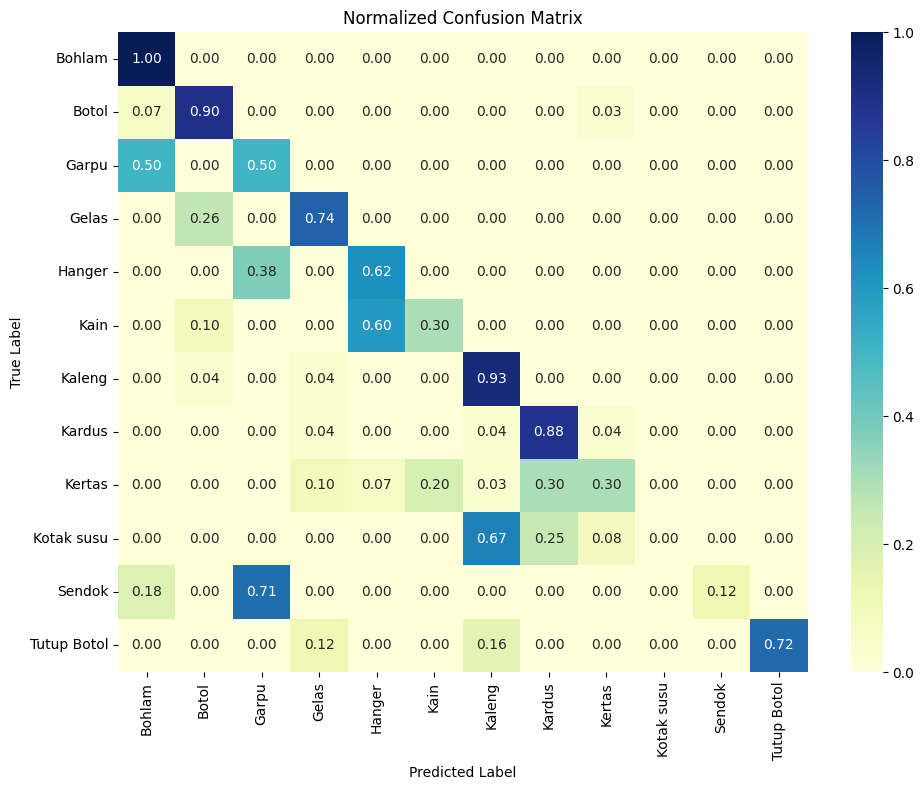

In [46]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
cm = sklearn.metrics.confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create heatmap using seaborn
sns.heatmap(
    cm_normalized,
    annot=True,  # Show numeric values
    cmap='YlGnBu',  # Color palette
    fmt='.2f',  # Format of the annotations
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

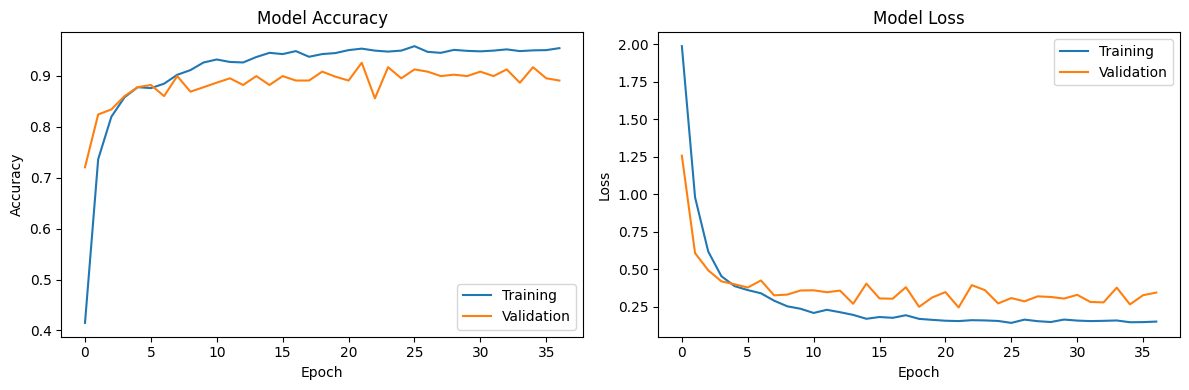

In [47]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
# Save model
model_save_path = os.path.join(model_output_dir, 'waste_detector.h5')
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to Waste_Detection_Model\waste_detector.h5


In [49]:
def visualize_model_prediction(image, true_labels, pred_probs, class_names):
    import matplotlib.pyplot as plt
    import numpy as np

    # Create figure with more space
    plt.figure(figsize=(15, 6))

    # Display image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Input Image')
    plt.axis('off')

    # Display prediction results
    plt.subplot(1, 2, 2)

    # Identify the index of the highest probability
    highest_prob_index = np.argmax(pred_probs)

    # Prepare prediction labels
    predicted_labels = (pred_probs).astype(int)

    # Create bar plot of probabilities
    bars = plt.bar(class_names, pred_probs, color='skyblue')
    plt.title('Prediction Probabilities')
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.xticks(rotation=45, ha='right')

    # Color and annotate bars based on probability and highlight the highest
    for i, (prob, pred_label, true_label) in enumerate(zip(pred_probs, predicted_labels, true_labels)):
        # Highlight the bar with the highest probability in green
        if i == highest_prob_index:
            color = 'green'
        else:
            color = 'lightcoral' if pred_label == 0 else 'orange'  # Default colors

        bars[i].set_color(color)

        # Annotate with probability and true/pred status
        status = '✓' if pred_label == true_label else '✗'
        plt.text(i, prob, f'{prob:.2f} {status}',
                 ha='center', va='bottom',
                 color='black', fontweight='bold')

    # Add legend to explain color coding
    plt.legend([
        plt.Rectangle((0,0),1,1, color='green', alpha=0.5),
        plt.Rectangle((0,0),1,1, color='lightcoral', alpha=0.5),
        plt.Rectangle((0,0),1,1, color='orange', alpha=0.5)
    ], [
        'Highest Probability',
        'Correct Negative',
        'Misclassification'
    ], loc='upper right')

    plt.tight_layout()
    plt.show()

In [50]:
# ImageDataGenerator for Testing Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 268 images belonging to 12 classes.


In [55]:
# Pilih indeks acak dari generator
random_idx = np.random.randint(len(test_generator))

# Ambil batch gambar dan label dari generator
test_batch, test_labels_batch = test_generator[random_idx]

# Choose 1 random image dan labels from batch
image_idx = np.random.randint(len(test_batch))
test_image = test_batch[image_idx]
true_label = test_labels_batch[image_idx]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


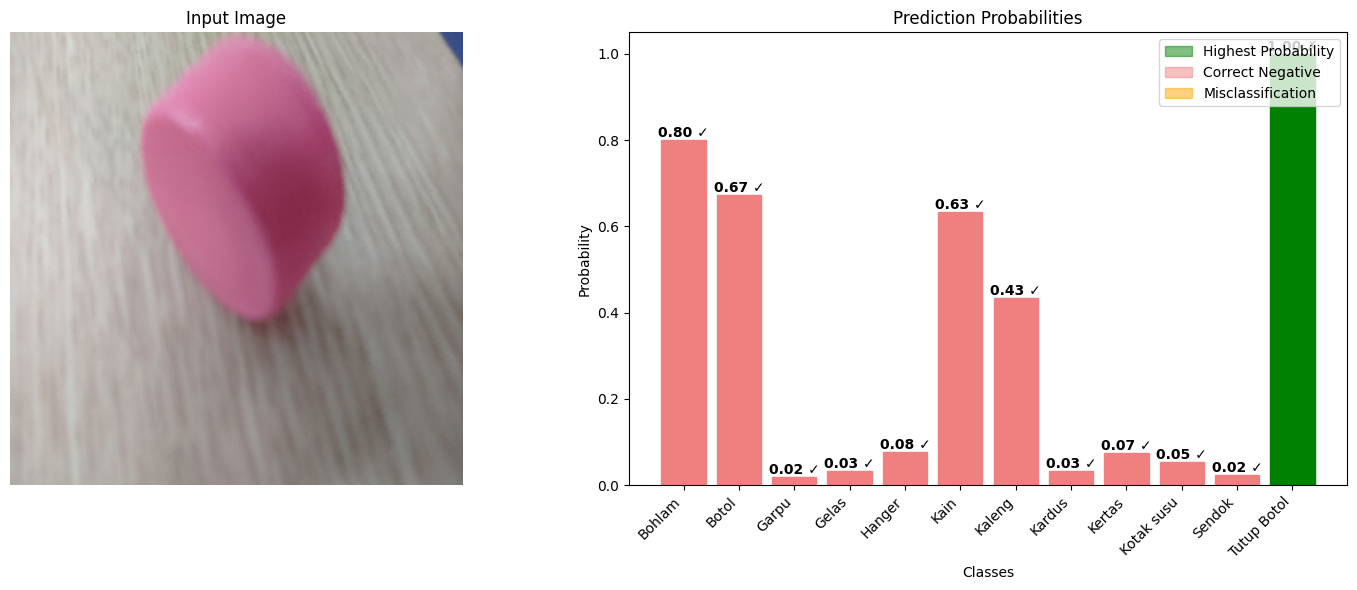

In [56]:
# Predict probabilities
pred_probs = model.predict(np.expand_dims(test_image, axis=0))[0]

# Visualize Prediction result
visualize_model_prediction(
    test_image,
    true_label,
    pred_probs,
    list(test_generator.class_indices.keys())
)

# Test Upload Image

In [142]:
from PIL import Image
import numpy as np

# Load the image
test_image_path = r"C:\Users\WatsonNick\Bangkit EcoCraft\1.jpg"
image = Image.open(test_image_path)

image_resized = image.resize((224, 224))
image_array = np.array(image_resized) / 255.0  # Normalize pixel values to [0, 1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted probabilities: [0.33740026 0.79546475 0.6376046  0.5655633  0.55980456 0.5034555
 0.23305385 0.48470876 0.52224535 0.611222   0.42460573 0.22995117]


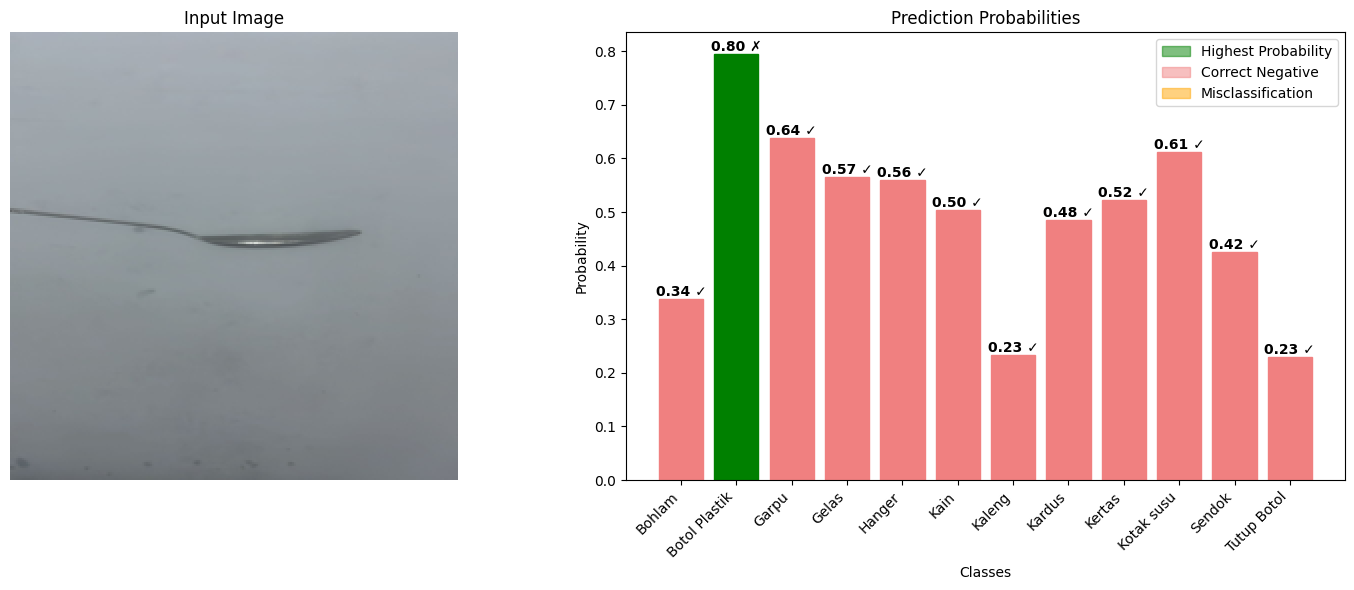

In [153]:
image_input = np.expand_dims(image_array, axis=0)  # Shape: (1, 224, 224, 3)

# Predict probabilities
pred_probs = model.predict(image_input)[0]

# Display the result
print("Predicted probabilities:", pred_probs)

# Visualisasikan hasil prediksi
visualize_model_prediction(
    image_resized,
    true_label,
    pred_probs,
    list(test_generator.class_indices.keys())
)